# **Electrical Grid Stability**

Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load the dataset

In [2]:
data = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


Separate the features and target variable

In [4]:
X = data.iloc[:, :12].values
y = data.iloc[:, -1].values

In [5]:
print(X)

[[2.95906002 3.0798852  8.38102539 ... 0.85957811 0.88744492 0.95803399]
 [9.30409723 4.90252411 3.04754073 ... 0.86241408 0.56213905 0.78175991]
 [8.97170691 8.84842842 3.04647875 ... 0.76668866 0.83944402 0.10985324]
 ...
 [2.36403419 2.84203025 8.77639096 ... 0.98650532 0.14928646 0.14598403]
 [9.63151069 3.9943976  2.75707093 ... 0.58755755 0.88911835 0.81839133]
 [6.53052662 6.7817899  4.34969522 ... 0.50544105 0.37876093 0.94263083]]


In [6]:
print(y)

['unstable' 'stable' 'unstable' ... 'stable' 'unstable' 'unstable']


Convert the label of stabf from non-numeric to numeric

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
print(y)

[1 0 1 ... 0 1 1]


In [9]:
print(label_encoder.classes_)

['stable' 'unstable']


Splitting into training and testing set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [11]:
print(X_train)

[[3.50701453 7.15335566 4.61349235 ... 0.54477719 0.74688676 0.50872781]
 [4.38290929 9.45628723 0.79690093 ... 0.18726774 0.57301351 0.69075494]
 [5.73529791 2.74241082 2.26546723 ... 0.71896669 0.37060865 0.52927706]
 ...
 [4.76059696 2.96843215 2.37988105 ... 0.60970263 0.38511496 0.22070566]
 [3.13795012 1.95411837 3.65221828 ... 0.65891458 0.41876253 0.69443716]
 [9.22503888 9.20423917 5.93176318 ... 0.73432097 0.49314138 0.15470259]]


In [12]:
print(X_test)

[[1.42812807 3.15414777 7.37101771 ... 0.65083456 0.29210831 0.98436788]
 [3.00455127 3.56403075 8.22281309 ... 0.49533033 0.77861569 0.93925815]
 [5.72602073 4.84184508 4.64073248 ... 0.9034245  0.79055221 0.79122565]
 ...
 [2.07105793 1.03571248 9.03528918 ... 0.06301639 0.8897895  0.56618311]
 [4.41118529 5.5078604  6.31612894 ... 0.15438479 0.48818862 0.69946221]
 [3.5836891  5.89841749 9.36854431 ... 0.12448922 0.40406698 0.78612923]]


In [13]:
print(y_train)

[1 0 0 ... 0 1 1]


In [14]:
print(y_test)

[1 1 1 ... 1 1 1]


Apply feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
print(X_train_std)

[[-0.6360014   0.69869998 -0.23314488 ...  0.06651508  0.8069309
  -0.05099622]
 [-0.31745834  1.53777113 -1.6267494  ... -1.23509317  0.17016247
   0.61398951]
 [ 0.17437473 -0.908424   -1.09051159 ...  0.7006983  -0.571096
   0.02407477]
 ...
 [-0.1801019  -0.82607332 -1.04873409 ...  0.3028934  -0.51797018
  -1.10320546]
 [-0.77022176 -1.19563768 -0.5841481  ...  0.48206262 -0.39474414
   0.62744146]
 [ 1.44351439  1.44593763  0.24821347 ...  0.75659962 -0.12234976
  -1.3443294 ]]


In [17]:
print(X_test_std)

[[-1.39204526 -0.75840799  0.77374827 ...  0.45264513 -0.85858439
   1.68662313]
 [-0.8187359  -0.60906748  1.08477604 ... -0.11350936  0.92313035
   1.52182721]
 [ 0.17100083 -0.14349692 -0.22319832 ...  1.37226599  0.96684493
   0.98103145]
 ...
 [-1.15822625 -1.53025808  1.38144661 ... -1.68746326  1.33027735
   0.1589008 ]
 [-0.307175    0.09916519  0.38856223 ... -1.35481229 -0.14048802
   0.64579909]
 [-0.6081166   0.24146433  1.50313264 ... -1.46365506 -0.44856302
   0.96241307]]


# **Logistic Regression**

Train the model using scaled features

In [18]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()
logistic_clf.fit(X_train_std, y_train)

LogisticRegression()

Predict class using test set

In [19]:
y_pred = logistic_clf.predict(X_test_std)
print(y_pred)

[1 1 1 ... 1 1 1]


In [20]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute F1 score using confusion matrix

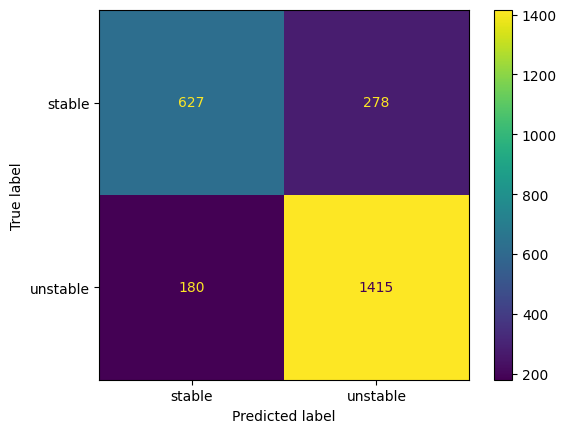

Precision: 0.836
Recall: 0.887
F1: 0.861


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_logistic_clf = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_logistic_clf = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_logistic_clf = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_logistic_clf}")
print(f"Recall: {recall_logistic_clf}")
print(f"F1: {F1_logistic_clf}")

# **Support Vector Machines**

**SVM (Linear)**

Train the model using scaled features

In [22]:
from sklearn.svm import SVC
svm_clf_linear = SVC(kernel='linear')
svm_clf_linear.fit(X_train_std, y_train)

SVC(kernel='linear')

Predict class using test set

In [23]:
y_pred = svm_clf_linear.predict(X_test_std)
print(y_pred)

[1 1 1 ... 1 1 1]


In [24]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute F1 score using confusion matrix

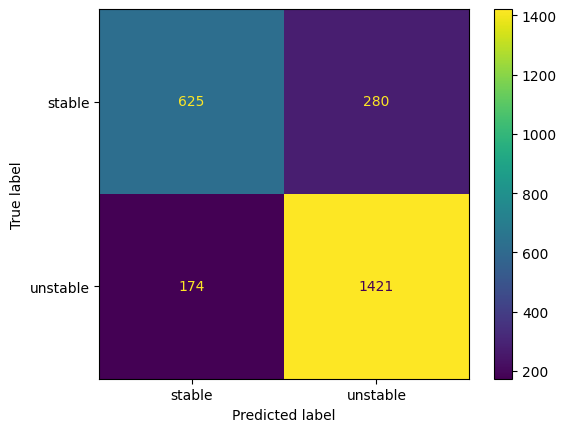

Precision: 0.835
Recall: 0.891
F1: 0.862


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_svm_clf_linear = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_svm_clf_linear = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_svm_clf_linear = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_svm_clf_linear}")
print(f"Recall: {recall_svm_clf_linear}")
print(f"F1: {F1_svm_clf_linear}")

**SVM (Polynomial)**

Train the model using scaled features

In [26]:
svm_clf_poly = SVC(kernel='poly')
svm_clf_poly.fit(X_train_std, y_train)

SVC(kernel='poly')

Predict class using test set

In [27]:
y_pred = svm_clf_poly.predict(X_test_std)
print(y_pred)

[1 1 1 ... 1 1 1]


In [28]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute F1 score using confusion matrix

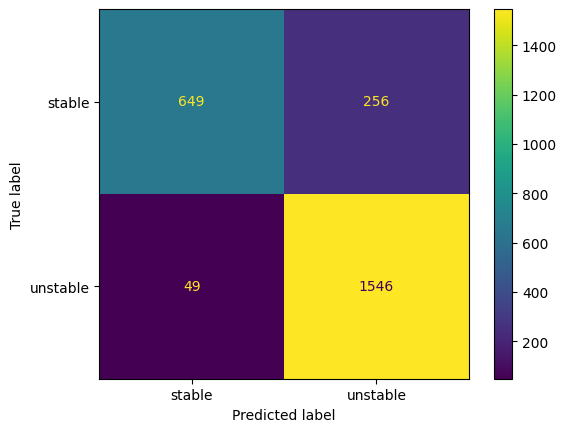

Precision: 0.858
Recall: 0.969
F1: 0.91


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_svm_clf_poly = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_svm_clf_poly = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_svm_clf_poly = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_svm_clf_poly}")
print(f"Recall: {recall_svm_clf_poly}")
print(f"F1: {F1_svm_clf_poly}")

**SVM (RBF)**

Train the model using scaled features

In [30]:
svm_clf_rbf = SVC(kernel='rbf')
svm_clf_rbf.fit(X_train_std, y_train)

SVC()

Predict class using test set

In [31]:
y_pred = svm_clf_rbf.predict(X_test_std)
print(y_pred)

[1 1 1 ... 1 1 1]


In [32]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute F1 score using confusion matrix

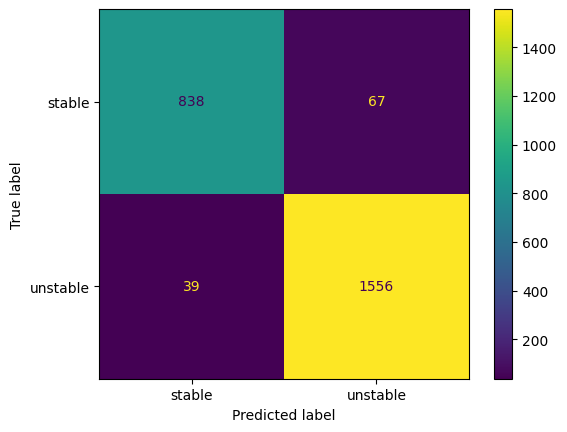

Precision: 0.959
Recall: 0.976
F1: 0.967


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_svm_clf_rbf = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_svm_clf_rbf = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_svm_clf_rbf = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_svm_clf_rbf}")
print(f"Recall: {recall_svm_clf_rbf}")
print(f"F1: {F1_svm_clf_rbf}")

# **Decision Trees**

Train the model using unscaled features

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Predict class using test set

In [35]:
y_pred = decision_tree_clf.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [36]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute F1 score using confusion matrix

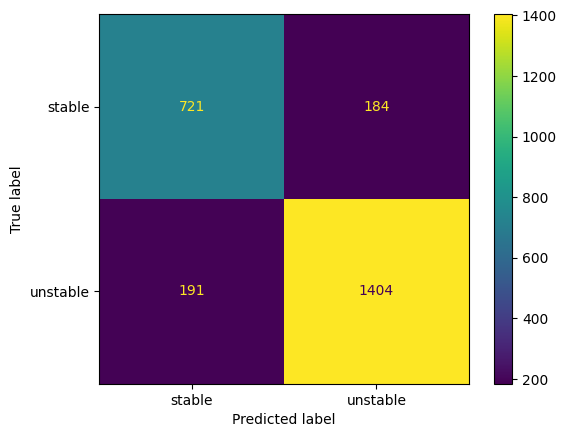

Precision: 0.884
Recall: 0.88
F1: 0.882


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_tree_clf = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_tree_clf = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_tree_clf = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_tree_clf}")
print(f"Recall: {recall_tree_clf}")
print(f"F1: {F1_tree_clf}")

# **Random Forest**

Train the model using unscaled features

In [38]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier()

Predict class using test set

In [39]:
y_pred = random_forest_clf.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [40]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute F1 score using confusion matrix

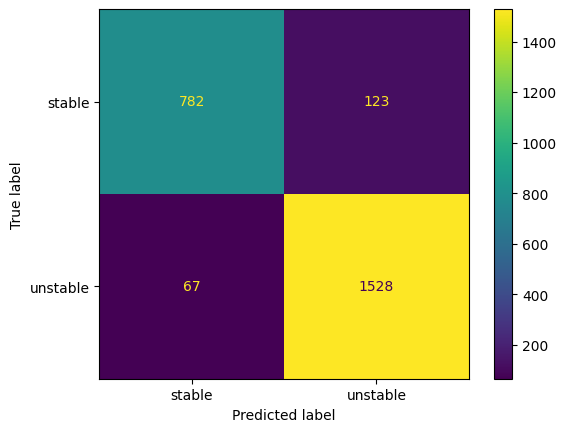

Precision: 0.925
Recall: 0.958
F1: 0.941


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_forest_clf = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_forest_clf = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_forest_clf = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_forest_clf}")
print(f"Recall: {recall_forest_clf}")
print(f"F1: {F1_forest_clf}")

# **AdaBoost**

Train the model using unscaled features

In [42]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier()

Predict class using test set

In [43]:
y_pred = adaboost_clf.predict(X_test)
print(y_pred)

[0 1 1 ... 0 1 1]


In [44]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute F1 score using confusion matrix

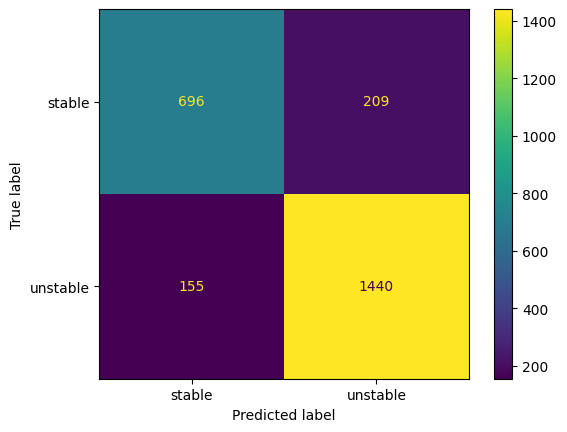

Precision: 0.873
Recall: 0.903
F1: 0.888


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_adaboost_clf = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_adaboost_clf = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_adaboost_clf = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_adaboost_clf}")
print(f"Recall: {recall_adaboost_clf}")
print(f"F1: {F1_adaboost_clf}")

# **Gradient Boosting**

Train the model using unscaled features

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_clf = GradientBoostingClassifier()
gradient_clf.fit(X_train, y_train)

GradientBoostingClassifier()

Predict class using test set

In [47]:
y_pred = gradient_clf.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [48]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute F1 score using confusion matrix

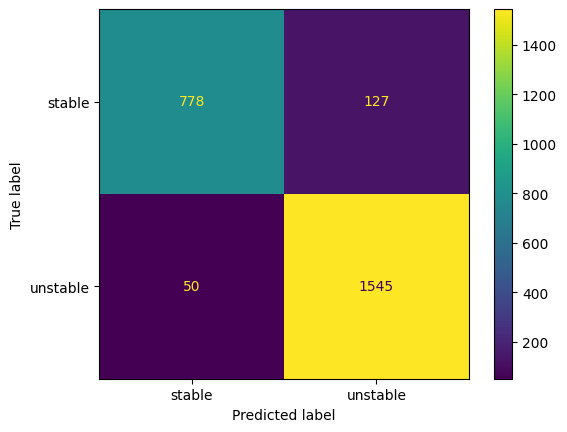

Precision: 0.924
Recall: 0.969
F1: 0.946


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_grboost_clf = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_grboost_clf = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_grboost_clf = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_grboost_clf}")
print(f"Recall: {recall_grboost_clf}")
print(f"F1: {F1_grboost_clf}")

# **Results**

Create the models and F1 scores of each model in separate lists

In [50]:
models = ["Logistic Regression", "SVM (Linear)", "SVM (Polynomial)", "SVM (RBF)", "Decision Tree", "Random Forest",
          "AdaBoost", "Gradient Boosting"]
F1_scores = [F1_logistic_clf, F1_svm_clf_linear, F1_svm_clf_poly, F1_svm_clf_rbf, F1_tree_clf,
             F1_forest_clf, F1_adaboost_clf, F1_grboost_clf]

Make a dataframe to tabulate the model name and its corresponding F1 score

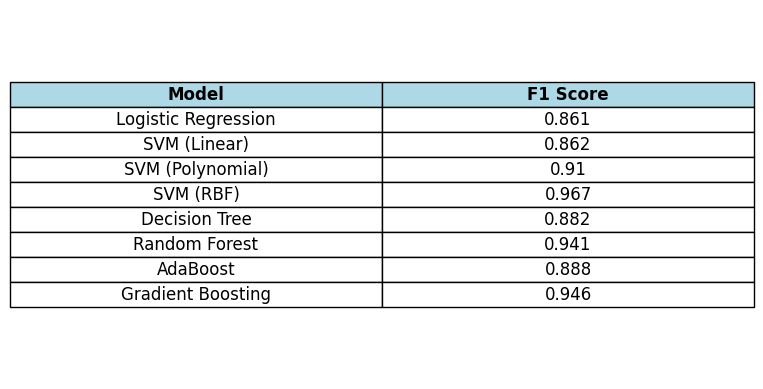

In [51]:
fig, ax = plt.subplots()

ax.axis('tight')
ax.axis('off')

table_data = list(zip(models, F1_scores))

table = ax.table(cellText=table_data, colLabels=["Model", "F1 Score"], cellLoc='center', loc='center')
table.set_fontsize(12)
table.scale(1.5, 1.5)


for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('lightblue')

plt.show()

Plot the score of each model in bar graph

<ipython-input-52-2fb4ffc39f8e>:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


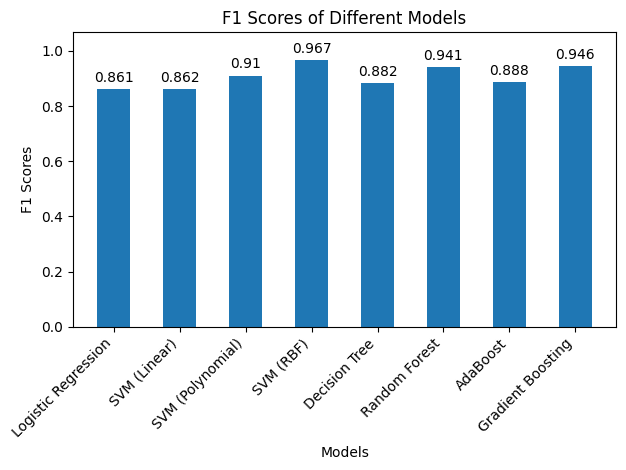

In [52]:
x = np.arange(len(models))
width = 0.5

fig, ax = plt.subplots(layout='constrained')

bars = ax.bar(x, F1_scores, width, tick_label=models)
ax.bar_label(bars, labels=[f'{score}' for score in F1_scores], padding=3)

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores of Different Models')

ax.set_xticks(x, labels=models)
ax.set_ylim(0, max(F1_scores) + 0.1)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()